<a href="https://colab.research.google.com/github/michaelherediaperez/mecanica_de_solidos_un/blob/main/codigos/cap_03/03_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4. Especificación de la deformación en otras direcciones (2D)

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Julio 16, 2022 | Conversión de código de MAXIMA a Python |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Septiembre 15, 2022 | Mejorando legibilidad |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Octubre 5, 2022 | Corrigiendo la matriz de transformación |

In [47]:
import sympy as sp  # Librería para cálculo simbólico.

# Para imprimir bonito
sp.init_printing() 
from IPython.display import Math               
def imprimir (texto, variable):
    return Math(texto +  rf'{sp.latex(variable)}')

Se definen las variables simbólicas necesarias.

In [48]:
ex, ey, exy, t = sp.symbols("varepsilon_x, varepsilon_y, varepsilon_xy, theta")

Se especifica la matriz de transformación, $\boldsymbol{T}$, ecuación (3.23)

In [49]:
T = sp.Matrix([[sp.cos(t), -sp.sin(t), 0],
               [sp.sin(t),  sp.cos(t), 0],
               [        0,          0, 1] ])
imprimir(r"\boldsymbol{T} = ", T)

<IPython.core.display.Math object>

Se especifica la matriz de deformaciones $\underline{\underline{\boldsymbol{\varepsilon}}}$ definida con respecto a la base dada por {$\boldsymbol{\hat{i}}=\boldsymbol{\hat{e}}_1$, $\boldsymbol{\hat{j}}=\boldsymbol{\hat{e}}_2$, $\boldsymbol{\hat{k}}=\boldsymbol{\hat{e}}_3$} 

In [50]:
# "def" es una palabra reservada de Python, entonces llamo "epsilon" a la matriz
epsilon = sp.Matrix([[ex, exy, 0],
                     [exy, ey, 0],
                     [0,    0, 0]])
imprimir(r"\underline{\underline{\boldsymbol{\varepsilon}}} = ", epsilon)

<IPython.core.display.Math object>

Se calcula la matriz de deformaciones $\underline{\underline{\boldsymbol{\varepsilon'}}}$ definida con respecto a la base dada por {$\boldsymbol{\hat{e'}}_1$, $\boldsymbol{\hat{e'}}_2$, $\boldsymbol{\hat{e'}}_3$}

In [51]:
epsilonP = sp.trigsimp( sp.Transpose(T)*epsilon*T)
imprimir(r"\underline{\underline{\boldsymbol{\varepsilon'}}} = ", epsilonP)

<IPython.core.display.Math object>

Se extraen las expresiones de interés de la matriz $\underline{\underline{\boldsymbol{\varepsilon'}}}$ (ecuación 3.16):

In [52]:
exp   = sp.expand(epsilonP[0,0])
eyp   = sp.expand(epsilonP[1,1])
expyp = sp.expand(epsilonP[0,1])

In [53]:
imprimir(r"\varepsilon_{x'}(\theta) = ", exp)

<IPython.core.display.Math object>

In [54]:
imprimir(r"\varepsilon_{y'}(\theta) = ", eyp)

<IPython.core.display.Math object>

In [55]:
imprimir(r"\varepsilon_{x'y'}(\theta) = ", expyp)

<IPython.core.display.Math object>

## Representación matricial

### Deformaciones matemáticas

Las ecuaciones obtenidas anteriormente: $\varepsilon_{x'}$, $\varepsilon_{y'}$ y $\varepsilon_{x'y'}$, definen las deformaciones longitudinales en los ejes $x'$, $y'$ y angulares en los planos $x'y'$, desde la perspectiva matemática. 

Podemos reorganizarlas en un sistema matricial de la forma $\boldsymbol{Ax} = \boldsymbol{b}$, siendo

$$\left[\begin{matrix}
\varepsilon_{x'} \\ 
\varepsilon_{y'}\\ 
\varepsilon_{x'y'} 
\end{matrix}\right] = 
\boldsymbol{T_{\underline{\underline{\sigma}},2D}}\left[\begin{matrix}\varepsilon_{x} \\ \varepsilon_{y}\\ \varepsilon_{xy} \end{matrix}\right]$$

In [56]:
Tsigma_2d = sp.linear_eq_to_matrix([exp, eyp, expyp], (ex, ey, exy))[0]
imprimir(r"\boldsymbol{T_{\underline{\underline{\sigma}},2D}} = ", Tsigma_2d)

<IPython.core.display.Math object>

Para que esta matriz de transformación conincida con la vista en clase, debemos aplicar simplificaciones a las relaciones trigonométricas de ángulos dobles con la función ```sp.expand_trig()``` y simplificando trigonométricamente con la función ```sp.trigsimp()```



In [57]:
Tsigma_2d = sp.expand_trig(sp.trigsimp(Tsigma_2d))
imprimir(r"\boldsymbol{T_{\underline{\underline{\sigma}},2D}} = ", Tsigma_2d)

<IPython.core.display.Math object>

Sabiendo que

$$2\text{cos}^2\theta-1 = \text{cos}^2\theta-\text{sin}^2\theta$$

### Deformaciones ingenieriles

Recordando la relación que existe entre las deformaciones matemáticas $\varepsilon_{xy}$ e ingenieriles $\gamma_{xy}$

$$\varepsilon_{xy} = \frac{1}{2}\gamma_{xy}$$

procedemos a calcular el siguiente sistema matricial:

$$\left[\begin{matrix}
\varepsilon_{x'} \\ 
\varepsilon_{y'}\\ 
\gamma_{x'y'} 
\end{matrix}\right] = 
\boldsymbol{T_{\underline{\underline{\varepsilon}},2D}}
\left[\begin{matrix}
\varepsilon_{x} \\ 
\varepsilon_{y}\\ 
\gamma_{xy} 
\end{matrix}\right]$$

Para ello, definimos simbólicamente a $\gamma_{xy}$ y aplicamos el método ```.subs()``` para reemplazar la igualdad anterior.

In [58]:
gxy = sp.Symbol("gamma_xy")

exp_i =   exp.subs(exy, gxy/2)
eyp_i =   eyp.subs(exy, gxy/2)
gxpyp = 2*expyp.subs(exy, gxy/2)

In [59]:
imprimir(r"\varepsilon_{x'}(\theta) = ", exp_i)

<IPython.core.display.Math object>

In [60]:
imprimir(r"\varepsilon_{y'}(\theta) = ", eyp_i)

<IPython.core.display.Math object>

In [61]:
imprimir(r"\gamma_{x'y'}(\theta) = ", gxpyp)

<IPython.core.display.Math object>

In [62]:
# Buscamos el sistema matricial.
Tepsilon_2d = sp.linear_eq_to_matrix([exp_i, eyp_i, gxpyp], (ex, ey, gxy))[0]

# Simplificamos las expresiones algebŕaicas como en el caso anterior
Tepsilon_2d = sp.expand_trig(sp.trigsimp(Tepsilon_2d))
imprimir(r"\boldsymbol{T_{\underline{\underline{\varepsilon}},2D}} = ", Tepsilon_2d)

<IPython.core.display.Math object>

Sabiendo que

$$2\text{cos}^2\theta-1 = \text{cos}^2\theta-\text{sin}^2\theta$$


### Identidades

Verificando $\boldsymbol{T_{\underline{\underline{\sigma}},2D}}^{-1}=\boldsymbol{T_{\underline{\underline{\varepsilon}},2D}}^T$:


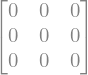

In [63]:
sp.trigsimp( Tsigma_2d**-1 - sp.transpose(Tepsilon_2d) )

Verificando $\boldsymbol{T_{\underline{\underline{\varepsilon}},2D}}^{-1}=\boldsymbol{T_{\underline{\underline{\sigma}},2D}}^T$:

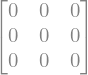

In [64]:
sp.trigsimp( Tepsilon_2d**-1 - sp.transpose(Tsigma_2d) )